# Preprocessing

### Setup
- This code assumes the data is in a 'data' directory (with 'train' and 'test' subdirectories) in the same directory as the notebook:

```
    /home
        Preprocessing.ipynb
        data/
            test/
            train/
```
- Additionally, for this project the training data is assumed to be placed in ten subdirectories (representing the 10 classes) when it is downloaded.

In [1]:
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data'

In [2]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))

%cd $LESSON_HOME_DIR
#import modules
from utils import *
import vgg16; reload(vgg16)
from vgg16 import Vgg16
from shutil import copyfile
import numpy as np
from glob import glob

%matplotlib inline

/home/ubuntu/courses/deeplearning1/nbs/statefarm


Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [5]:
# Create directory structure:
%cd $DATA_HOME_DIR

%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/home/ubuntu/courses/deeplearning1/nbs/statefarm/data


In [6]:
# Create subdirectory structure for the validation data (10 class labels):

%cd $DATA_HOME_DIR/valid
for i in range(10):
    os.mkdir(os.path.expanduser(DATA_HOME_DIR + '/valid/c' + str(i)))

/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/valid


In [7]:
# Repeat this process so we have subdirectories for our sample training and validation sets.
for i in range(10):
    os.mkdir(os.path.expanduser(DATA_HOME_DIR + '/sample/valid/c' + str(i)))
    os.mkdir(os.path.expanduser(DATA_HOME_DIR + '/sample/train/c' + str(i)))

### Create validation set

In [11]:
# Move 700 randomly chosen image files from each training data class to create validation set:

%cd $DATA_HOME_DIR/train
for i in range(10):
    class_path = DATA_HOME_DIR + '/train/c' + str(i)
    %cd $class_path
    g = glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(700):
        os.rename(shuf[j], DATA_HOME_DIR + '/valid/' + ('c' + str(i) + '/') + shuf[j])
        #print(DATA_HOME_DIR + '/valid/' + ('c' + str(i) + '/') + shuf[j])

/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c0
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c1
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c2
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c3
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c4
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c5
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c6
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c7
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c8
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c9


### Create sample data set (w/validation, test and train data)

In [12]:
from shutil import copyfile

In [15]:
# Create sample data. Includes copying files from both train and valid to create miniature subsets of each.

for i in range(10):
    train_class_path = DATA_HOME_DIR + '/train/c' + str(i)
    valid_class_path = DATA_HOME_DIR + '/valid/c' + str(i)
    %cd $train_class_path
    g = glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(10):
        copyfile(shuf[j], DATA_HOME_DIR+'/sample/train/c' + str(i) + '/' + shuf[j])
        #print DATA_HOME_DIR+'/sample/train/c' + str(i) + '/' + shuf[j]
    %cd $valid_class_path
    g = glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(3):
        copyfile(shuf[j], DATA_HOME_DIR+'/sample/valid/c' + str(i) + '/' + shuf[j])
        #print DATA_HOME_DIR+'/sample/valid/c' + str(i) + '/' + shuf[j]

/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c0
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/valid/c0
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c1
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/valid/c1
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c2
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/valid/c2
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c3
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/valid/c3
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c4
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/valid/c4
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c5
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/valid/c5
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c6
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/valid/c6
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/train/c7
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/v

In [17]:
# We also need to sample the test data.

%cd $DATA_HOME_DIR/test
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(500):
    copyfile(shuf[i], DATA_HOME_DIR+'/sample/test/' + shuf[i])
    #print(DATA_HOME_DIR+'/sample/test/' + shuf[i])

/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/test


In [9]:
# We need to move the test data to an 'unknown' directory so vgg can read it.

%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

%cd $DATA_HOME_DIR/sample/test
%mkdir unknown
%mv *.jpg unknown/

/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/test
mv: cannot stat '*.jpg': No such file or directory
/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/sample/test


### Train and finetune the model

In [3]:
%cd $LESSON_HOME_DIR

vgg = Vgg16()
batch_size = 64

/home/ubuntu/courses/deeplearning1/nbs/statefarm


#### Set up file paths

In [4]:
#Use the second path variable for testing on a small sample.

#path = DATA_HOME_DIR 
path = DATA_HOME_DIR + '/sample'

test_path = path + '/test/'
results_path=DATA_HOME_DIR + '/results/'
valid_path = path + '/valid/'
train_path = path + '/train/'


In [5]:
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)

Found 100 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [6]:
vgg.finetune(batches)
vgg.model.optimizer.lr = 0.01

### Train the vgg model

In [7]:
#For each epoch we test our model against the validation set
latest_weights_filename = None
no_of_epochs = 4
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
100/100 [==============================] - 4s - loss: 6.4341 - acc: 0.1100 - val_loss: 10.3039 - val_acc: 0.1000
Running epoch: 1
Epoch 1/1
100/100 [==============================] - 4s - loss: 10.6780 - acc: 0.2000 - val_loss: 10.7075 - val_acc: 0.2000
Running epoch: 2
Epoch 1/1
100/100 [==============================] - 4s - loss: 10.5101 - acc: 0.2100 - val_loss: 10.5291 - val_acc: 0.1333
Running epoch: 3
Epoch 1/1
100/100 [==============================] - 4s - loss: 9.2892 - acc: 0.2700 - val_loss: 10.0405 - val_acc: 0.2000
Completed 4 fit operations


## Generate predictions

In [5]:
# Optional
vgg.model.load_weights(results_path + 'ft3.h5')

In [6]:
batches, preds = vgg.test(test_path, batch_size=batch_size)

Found 500 images belonging to 1 classes.


In [7]:
filenames = batches.filenames
print(filenames[:2])

['unknown/img_100254.jpg', 'unknown/img_23985.jpg']


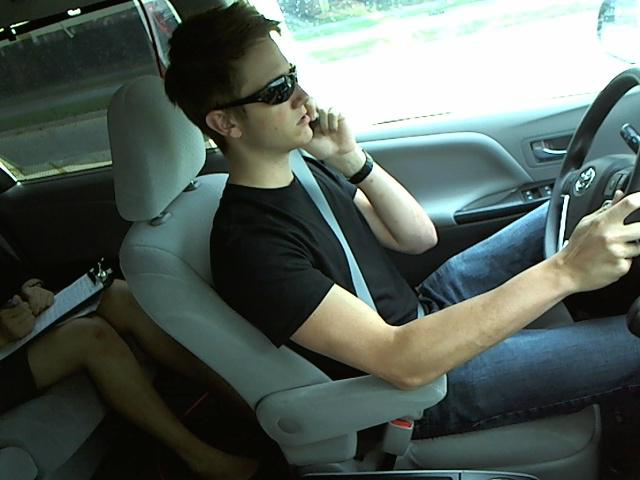

In [12]:
from PIL import Image

Image.open(test_path + filenames[0])

In [8]:
# Optional: save our results for later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

## Validate Predictions

In [5]:
vgg.model.load_weights(results_path + 'ft3.h5')
val_batches, val_probs = vgg.test(valid_path,batch_size=batch_size)
val_filenames = val_batches.filenames
expected_labels = val_batches.classes

Found 30 images belonging to 10 classes.


In [41]:
predicted_labels = ([np.argmax(p) for p in val_probs])

In [7]:
from keras.preprocessing import image
n_view = 4
def plots_idx(idx,titles=None):
    plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=titles)

Found 6 correct labels
Confidence:
[0.99847764, 0.8407132, 0.99636143, 0.9999814]


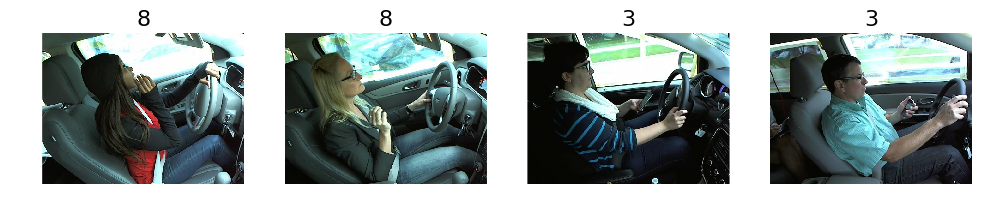

In [8]:
# Cases that the model guessed correctly
correct = np.where(predicted_labels == expected_labels)[0]
print("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, [np.argmax(p) for p in val_probs[idx]])
print("Confidence:")
args = [np.argmax(p) for p in val_probs[idx]]
print([val_probs[idx][i][args[i]] for i in range(len(args))])

Found 24 incorrect labels
Confidence:
[0.78334957, 0.56529582, 0.85734886, 0.96632338]
Predicted probability of the correct answer:
[0.21630615, 0.0, 7.2065349e-30, 5.7217035e-06]


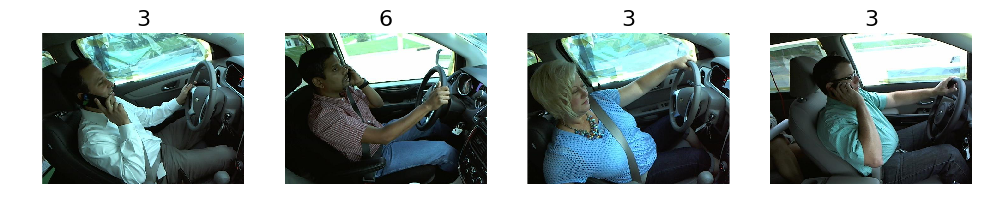

In [11]:
# Cases where the model guessed incorrectly
incorrect = np.where(predicted_labels != expected_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, [np.argmax(p) for p in val_probs[idx]])
print("Confidence:")
args = [np.argmax(p) for p in val_probs[idx]]
print([val_probs[idx][i][args[i]] for i in range(len(args))])
print("Predicted probability of the correct answer:")
correct_labels = expected_labels[idx]
print([val_probs[idx[i]][correct_labels[i]] for i in range(len(idx))])

[ 0  2  3  4  5  6  7  9 10 11 13 17 18 19 20 21 23 28 29]
Found 4 confident correct predictions.
Confidence:
[0.70902246, 0.99636143, 0.99858826, 0.9999814]


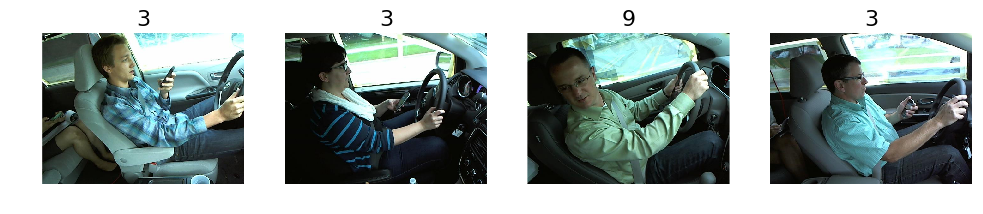

In [39]:
# Most confident correct predictions:
confident_predictions = np.where(np.max(val_probs[predicted_labels],axis=1)>=0.99)[0]
correct_predictions = np.where((predicted_labels==expected_labels))[0]
confident_and_correct = np.intersect1d(confident_predictions,correct_predictions)
print(np.where(np.max(val_probs[predicted_labels],axis=1)>=0.99)[0])
print("Found %d confident correct predictions." % len(confident_and_correct))
idx = permutation(confident_and_correct)[:n_view]
plots_idx(idx, [np.argmax(p) for p in val_probs[idx]])
print('Confidence:')
args = [np.argmax(p) for p in val_probs[idx]]
print([val_probs[idx][i][args[i]] for i in range(len(args))])

In [24]:
from IPython.display import FileLink
%cd $LESSON_HOME_DIR
#FileLink('data/redux/'+submission_file_name)
FileLink('Preprocessing.ipynb')

/home/ubuntu/courses/deeplearning1/nbs/statefarm


/home/ubuntu/courses/deeplearning1/nbs/statefarm/Preprocessing.ipynb